In [36]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from madaline import MADALINE
from hebbian import Hebbian
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:

# Load the dataset
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

# List of columns to remove
columns_to_remove = ['number of reviews','Title','Clothing ID', 'Age', 'Division Name', 'Department Name', 'Class Name']

# Drop the specified columns
data.drop(columns_to_remove, axis=1, inplace=True)


In [38]:

# Preprocessing the Review Text column
def preprocess_text(text):
    # Check if text is a string
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]

        stemmer = SnowballStemmer(language='english')  # Initialize Snowball stemmer
        stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]  # Stem tokens

        # Join tokens back into text
        processed_text = ' '.join(stemmed_tokens)
        return processed_text
    else:
        return ""  # Return an empty string if text is not a string

# Apply preprocessing to the Review Text column
data['Review Text'] = data['Review Text'].apply(preprocess_text)

# Define features (X) and target (y)
X = data['Review Text']
y = data['Rating'].apply(lambda x: 1 if x > 3 else 0)  # Convert ratings to binary sentiment labels


In [39]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # You can adjust the max_features parameter as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [40]:


# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [41]:

# Train a perceptron model
perceptron_model = Perceptron()
perceptron_model.fit(X_train_tfidf, y_train)


Perceptron()

In [11]:

# Initialize and train the MLP feedforward model with SGD solver
mlp_feedforward_model = MLPClassifier(hidden_layer_sizes=(200,100,50), max_iter=2000, solver='sgd',activation='relu', random_state=42)
mlp_feedforward_model.fit(X_train_tfidf, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=2000, random_state=42,
              solver='sgd')

In [12]:

# Train an MLP with backpropagation
mlp_backpropagation_model = MLPClassifier(hidden_layer_sizes=(200,100,50), max_iter=2000)
mlp_backpropagation_model.fit(X_train_tfidf, y_train)


MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=2000)

In [43]:

# Train an Adaline model
adaline_model = SGDClassifier(loss='perceptron', eta0=.5, learning_rate='constant', penalty=None)
adaline_model.fit(X_train_tfidf, y_train)


SGDClassifier(eta0=0.5, learning_rate='constant', loss='perceptron',
              penalty=None)

In [42]:

# Train a MADALINE model
madaline_model = MADALINE(input_size=X_train_tfidf.shape[1])
madaline_model.train(X_train_tfidf.toarray(), y_train.to_numpy(), learning_rate=0.1, epochs=100)


In [50]:


# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_tfidf)
y_pred_perceptron = perceptron_model.predict(X_test_tfidf)
y_pred_mlp_feedforward = mlp_feedforward_model.predict(X_test_tfidf)
y_pred_mlp_backpropagation = mlp_backpropagation_model.predict(X_test_tfidf)
y_pred_adaline = adaline_model.predict(X_test_tfidf)
y_pred_madaline = madaline_model.predict(X_test_tfidf.toarray())




In [54]:


# Evaluate the models
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
accuracy_mlp_feedforward = accuracy_score(y_test, y_pred_mlp_feedforward)
accuracy_mlp_backpropagation = accuracy_score(y_test, y_pred_mlp_backpropagation)
accuracy_adaline = accuracy_score(y_test, y_pred_adaline)
accuracy_madaline = accuracy_score(y_test, y_pred_madaline)



In [57]:


# Confusion Matrix and Classification Report
print("Logistic Regression Model:")
print("Accuracy:", int(accuracy_logistic * 100), '%')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("\nPerceptron Model:")
print("Accuracy:", int(accuracy_perceptron * 100), '%')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_perceptron))
print("Classification Report:")
print(classification_report(y_test, y_pred_perceptron))

print("\nMLP Feedforward Model:")
print("Accuracy:", int(accuracy_mlp_feedforward * 100), '%')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp_feedforward))
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp_feedforward))

print("\nMLP Backpropagation Model:")
print("Accuracy:", int(accuracy_mlp_backpropagation * 100), '%')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp_backpropagation))
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp_backpropagation))

print("\nAdaline Model:")
print("Accuracy:", int(accuracy_adaline * 100), '%')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adaline))
print("Classification Report:")
print(classification_report(y_test, y_pred_adaline))

print("\nMADALINE Model:")
print("Accuracy:", int(accuracy_madaline * 100), '%')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_madaline))
print("Classification Report:")
print(classification_report(y_test, y_pred_madaline))



Logistic Regression Model:
Accuracy: 86 %
Confusion Matrix:
[[ 910  734]
 [ 231 5208]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.55      0.65      1644
           1       0.88      0.96      0.92      5439

    accuracy                           0.86      7083
   macro avg       0.84      0.76      0.78      7083
weighted avg       0.86      0.86      0.85      7083


Perceptron Model:
Accuracy: 83 %
Confusion Matrix:
[[ 950  694]
 [ 443 4996]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.63      1644
           1       0.88      0.92      0.90      5439

    accuracy                           0.84      7083
   macro avg       0.78      0.75      0.76      7083
weighted avg       0.83      0.84      0.83      7083


MLP Feedforward Model:
Accuracy: 85 %
Confusion Matrix:
[[1050  594]
 [ 463 4976]]
Classification Report:
              precision    

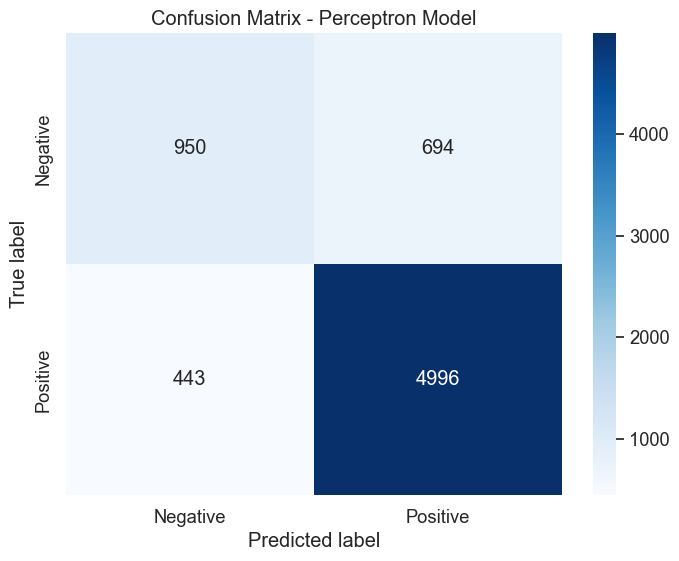

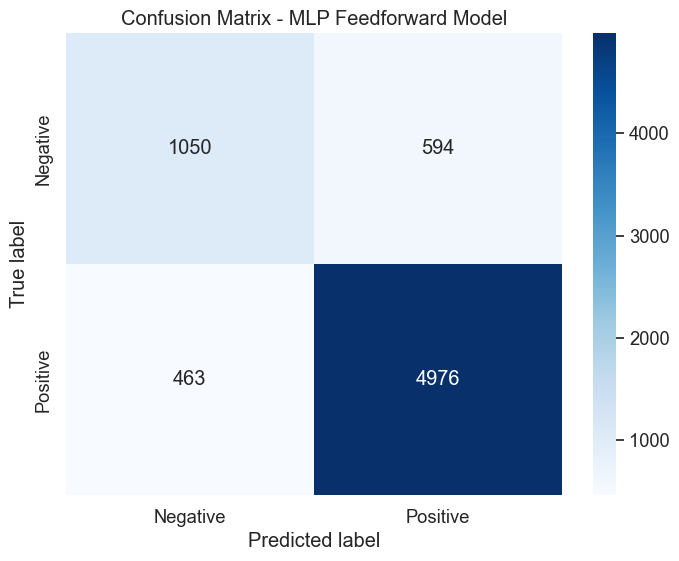

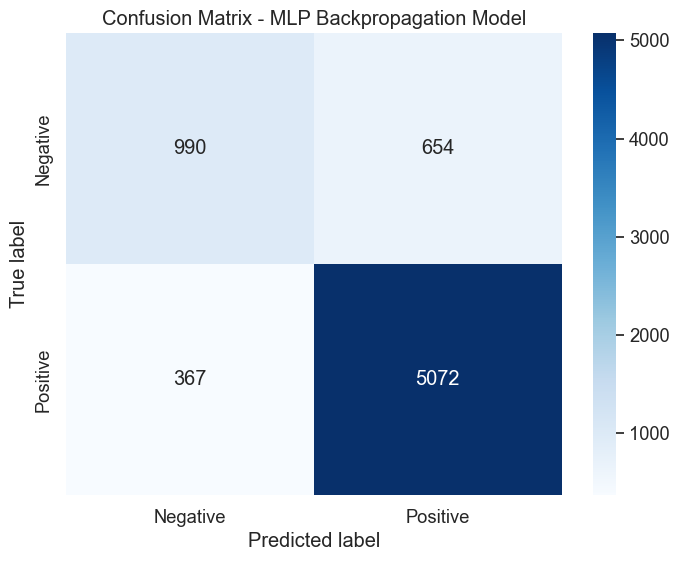

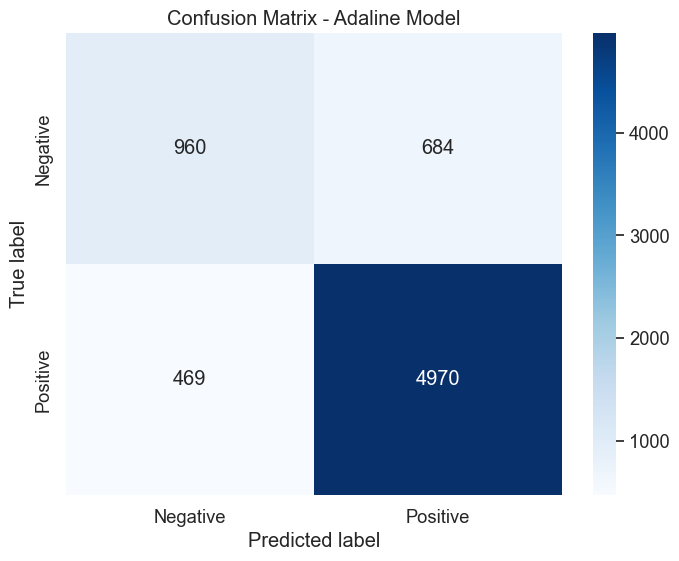

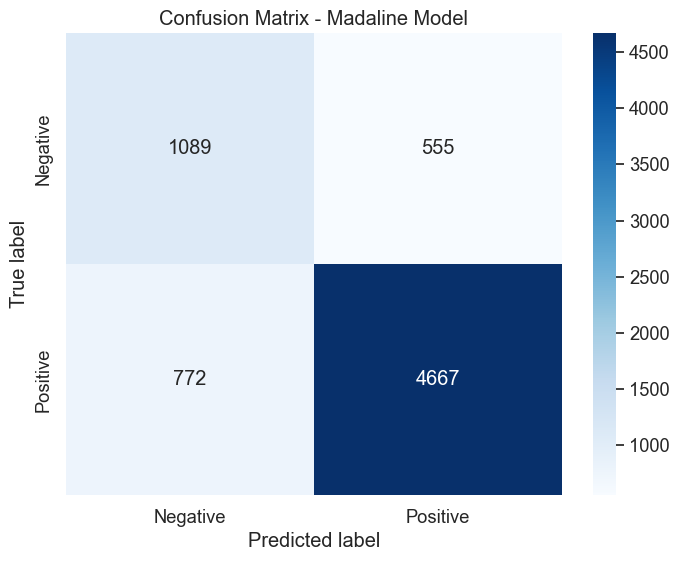

In [59]:


# Visualize Confusion Matrices
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')


models = ["Perceptron", "MLP Feedforward", "MLP Backpropagation", "Adaline","Madaline"]
for i, y_pred in enumerate([ y_pred_perceptron, y_pred_mlp_feedforward, y_pred_mlp_backpropagation, y_pred_adaline,y_pred_madaline]):
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, labels=["Negative", "Positive"])
    plt.title(f"Confusion Matrix - {models[i]} Model")
    plt.show()




In [63]:

new_reviews = [
    "love it",
    "good quality.",
    "i dont like it",
    "bad quality",
]

# Print the predictions using all models
print("\nPredictions using Logistic Regression Model:")
for review, prediction in zip(new_reviews, y_pred_logistic):
    sentiment = "Positive" if prediction == 1 else "Negative"
    print("Review:", review)
    print("Predicted Sentiment:", sentiment)
    print()

print("\nPredictions using Perceptron Model:")
for review, prediction in zip(new_reviews, y_pred_perceptron):
    sentiment = "Positive" if prediction == 1 else "Negative"
    print("Review:", review)
    print("Predicted Sentiment:", sentiment)
    print()
    

print("\nPredictions using MLP Feedforward Model:")
for review, prediction in zip(new_reviews, y_pred_mlp_feedforward):
    sentiment = "Positive" if prediction == 1 else "Negative"
    print("Review:", review)
    print("Predicted Sentiment:", sentiment)
    print()


print("\nPredictions using MLP Backpropagation Model:")
for review, prediction in zip(new_reviews, y_pred_mlp_backpropagation):
    sentiment = "Positive" if prediction == 1 else "Negative"
    print("Review:", review)
    print("Predicted Sentiment:", sentiment)
    print()    


print("\nPredictions using Adaline Model:")
for review, prediction in zip(new_reviews, y_pred_adaline):
    sentiment = "Positive" if prediction == 1 else "Negative"
    print("Review:", review)
    print("Predicted Sentiment:", sentiment)
    print()
    
print("\nPredictions using Madaline Model:")
for review, prediction in zip(new_reviews, y_pred_madaline):
    sentiment = "Positive" if prediction == 1 else "Negative"
    print("Review:", review)
    print("Predicted Sentiment:", sentiment)
    print()




Predictions using Logistic Regression Model:
Review: love it
Predicted Sentiment: Positive

Review: good quality.
Predicted Sentiment: Positive

Review: i dont like it
Predicted Sentiment: Negative

Review: bad quality
Predicted Sentiment: Negative

Review: poor quality
Predicted Sentiment: Positive


Predictions using Perceptron Model:
Review: love it
Predicted Sentiment: Positive

Review: good quality.
Predicted Sentiment: Positive

Review: i dont like it
Predicted Sentiment: Negative

Review: bad quality
Predicted Sentiment: Positive

Review: poor quality
Predicted Sentiment: Positive


Predictions using MLP Feedforward Model:
Review: love it
Predicted Sentiment: Positive

Review: good quality.
Predicted Sentiment: Positive

Review: i dont like it
Predicted Sentiment: Negative

Review: bad quality
Predicted Sentiment: Positive

Review: poor quality
Predicted Sentiment: Positive


Predictions using MLP Backpropagation Model:
Review: love it
Predicted Sentiment: Positive

Review: goo